"""
Created: 18-Jun-2021

@author: Deb
"""

"""
Dataset Information
Number of Instances: 150 (50 in each of three classes)
Number of Attributes: 4 numeric, predictive attributes and the class


Attribute Information:

sepal length in cm

sepal width in cm

petal length in cm

petal width in cm

class: 

    Iris Setosa
    
    Iris Versicolour
    
    Iris Virginica

Missing Attribute Values: None

"""

In [3]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_base = pd.read_csv(r"D:\Python_works\Datasets\Clustering_IrisFlowers\iris.data", header=None, names=["sepal_length","sepal_width","petal_length","petal_width","class"])

In [6]:
df_base.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Describe data
df_base.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Info on dataset
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Output distribution
df_base['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [10]:
# Null check
df_base.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

There is no NULL values and classes are distributed evenly i.e. Balanced dataset. Now lets start with EDA!

## Exploratory Data Analysis - better understand the data

1. 1D Scatter Plot

In [11]:
iris_setosa = df_base.loc[df_base['class']=="Iris-setosa"]
iris_versicolor = df_base.loc[df_base['class']=="Iris-versicolor"]
iris_virginica = df_base.loc[df_base['class']=="Iris-virginica"]

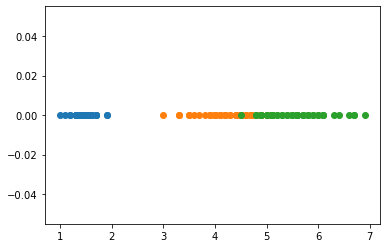

In [12]:
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa["petal_length"]), 'o')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]), 'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]), 'o')
plt.show()

Observations:

  i. Green points are Virginica, orange points are Versicolor and blue points are Setosa
  
 ii. Virginica and Versicolor are overlappin
 
iii. 1D Scatter is not giving any valuable insight


2. 2D Scatter Plot

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


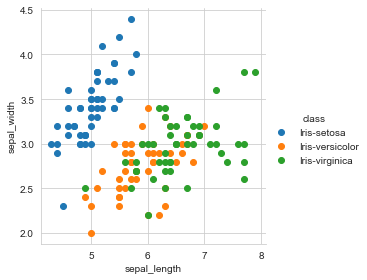

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(df_base,hue="class",size=4) \
    .map(plt.scatter,"sepal_length","sepal_width") \
    .add_legend()
plt.show()

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


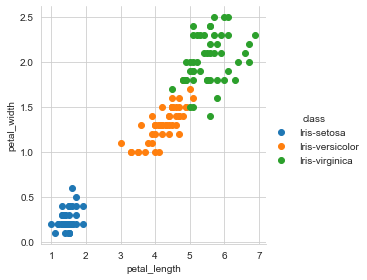

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(df_base,hue="class",size=4) \
    .map(plt.scatter,"petal_length","petal_width") \
    .add_legend()
plt.show()

Observations:

  i. There are some overlapping of features, hence difficult to interpret

3. Pair plots

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


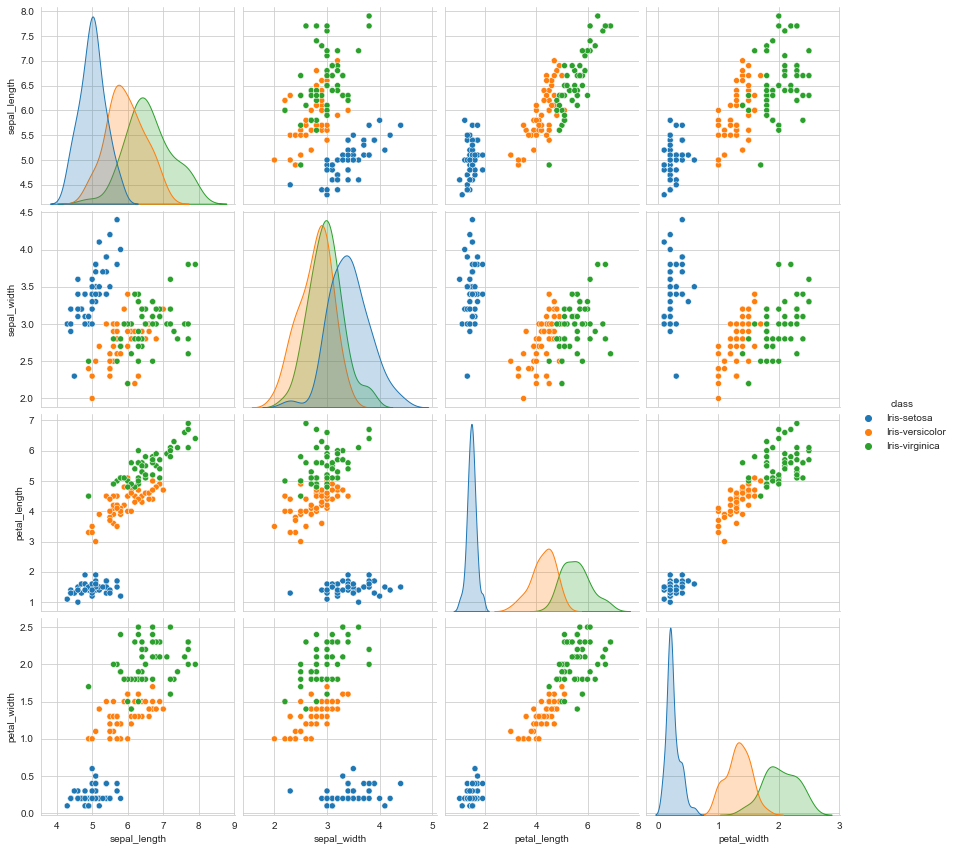

In [15]:
sns.set_style("whitegrid")
sns.pairplot(df_base, hue="class",size=3)
plt.show()

Observations:

  i. petal length and petal width are the most useful features to identify various flower types
  
 ii. While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable)
 
iii. We can find “lines” and “if-else” conditions to build a simple model to classify the flower types

4. Correlation with Heatmap

In [16]:
df_base.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

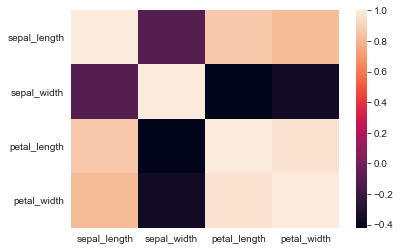

In [17]:
sns.heatmap(df_base.corr())

5. Univariate Analysis - Joint plot

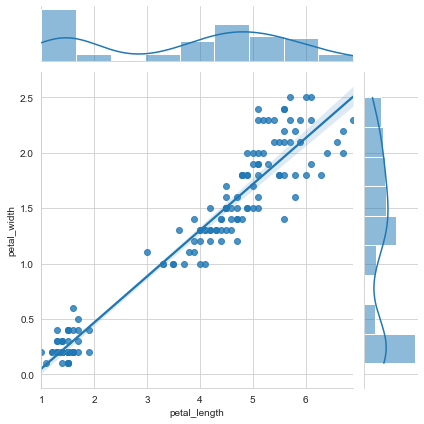

In [18]:
sns.jointplot(x='petal_length',y='petal_width',data=df_base,kind="reg")

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

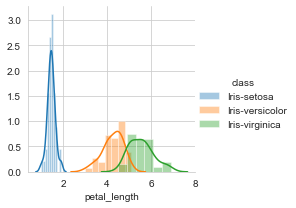

In [19]:
sns.FacetGrid(df_base,hue="class")\
    .map(sns.distplot,'petal_length')\
    .add_legend()

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

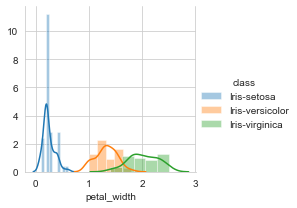

In [20]:
sns.FacetGrid(df_base,hue="class")\
    .map(sns.distplot,'petal_width')\
    .add_legend()

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

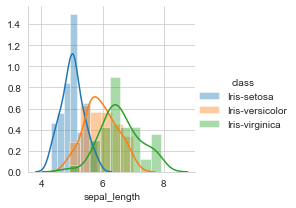

In [21]:
sns.FacetGrid(df_base,hue="class")\
    .map(sns.distplot,'sepal_length')\
    .add_legend()

C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deb\AppData\Local\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

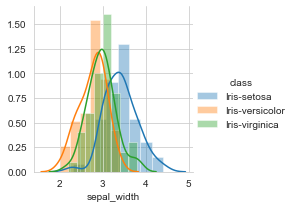

In [22]:
sns.FacetGrid(df_base,hue="class")\
    .map(sns.distplot,'sepal_width')\
    .add_legend()

## K-means Clustering

In [25]:
from sklearn.cluster import KMeans

### Finding optimal number of clusters

In [31]:
x = df_base.iloc[:,:4].values
check=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    check.append(kmeans.inertia_)

### Plotting the result to observe "The Elbow"

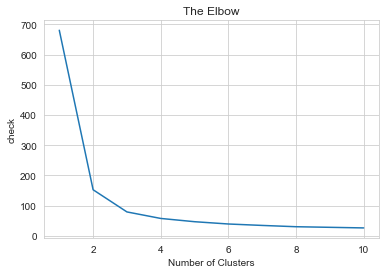

In [33]:
plt.plot(range(1,11),check)
plt.title("The Elbow")
plt.xlabel("Number of Clusters")
plt.ylabel("check")
plt.show()

### Creating K-means Classifier

In [35]:
kmeans = KMeans(n_clusters=3,init="k-means++",max_iter=300, n_init=10, random_state=0)
y_means=kmeans.fit_predict(x)

### Evaluation

In [36]:
print(y_means)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


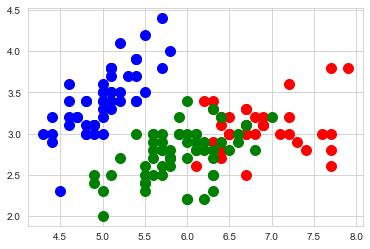

In [37]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=100, c='red', label='iris-setosa')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=100, c='blue', label='iris-versicolor')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=100, c='green', label='iris-virginica')

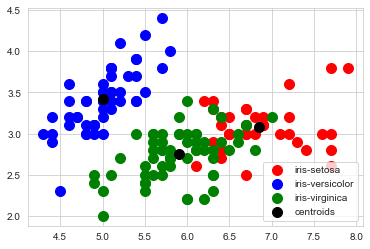

In [39]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=100, c='red', label='iris-setosa')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=100, c='blue', label='iris-versicolor')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=100, c='green', label='iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')
plt.legend()